## Learning Algorithm

Deep Deterministic Policy Gradient (DDPG) was used to solve this environment (see also https://arxiv.org/abs/1509.02971).
The algorithms uses two neural networks: One to approximate the action-value function (critic network) and one to implement the policy (actor network). During each update, the critic is optimized to better fit the action-value function according to:

$a_{t+1} = actor(s_{t+1})$

$Q_{target} = r + (\gamma * critic(s_{t+1}, a_{t+1}))$

$Q_{expected} = critic(s_{t}, a_{t})$

$L = \sqrt{(Q_{expected} - Q_{target})^2}$

where $L$ is the loss to be minimized.

The actor is optimized to pick the action with the highest value predicted by the critic.

### Parameters

| parameter | value | comment |
| --- | --- | --- |
| tau | $1e^{-2}$ | soft update of target parameters |
| gamma | 0.95 | discount factor |
| BUFFER_SIZE | $1e^6$ | replay buffer size |
| BATCH_SIZE | 128 | minibatch size |
| GRAD_CLIP | 1.0 | clipping of gradient for critic |
| UPDATE_EVERY |  1 | the agents are updated every step |
| N_LEARN_UPDATES |  1 | when updated it is done once with new samples from the replaybuffer |


### Noise for exploration

Ornstein-Uhlenbeck process

| parameter | value |
| --- | --- |
| mu |  0 |
| theta |  0.15 |
| sigma |  0.05 |

The scale of the noise was reduced each update by muliplying it by `EXPLORATION_DECAY` = $0.9995$

### Actor Neural Network


| layer | parameters |
| --- | --- |
| batch normalization |   |
| dense | 64 nodes |
| activation |  leaky Relu |
| dense|  dense 4 nodes for action values |

Optimized with Adam at learning rate $1e-4$


### Critic Neural Network


| layer | parameters |
| --- | --- |
| batch normalization |   |
| dense | 64 nodes |
| activation |  leaky Relu |
| dense | 32 nodes + 4 actions added in |
| activation |  leaky Relu |
| dense|  dense 1 nodes for q values |

Optimized with Adam at learning rate $3e-4$



## Plot of Rewards

The data was created with the `Continous_Control.ipynb`. An average reward of $30$ over $100$ episodes was first reached at episode $90$.




In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv('scores.csv')
avg_data = pd.read_csv('avg_scores.csv', index_col=0, sep='\t')

#### Train Scores

In [22]:
data

,score
0,0.818500
1,0.952000
2,1.143000
3,1.288000
4,0.957500
...,...
145,36.461499
146,37.294499
147,38.444999
148,37.260499


#### Test Scores

In [23]:
avg_data

,avg score
10,2.023000
20,3.452500
30,6.206500
40,15.022000
50,15.414500
60,18.561000
70,17.909000
80,22.085500
90,30.538999
100,34.565499


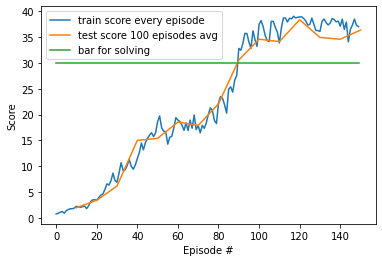

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(data.index, data.score, label='train score every episode')
plt.plot(avg_data.index, avg_data['avg score'], label='test score 100 episodes avg')
plt.plot(data.index, [30] * len(data), label='bar for solving')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()




## Ideas for Future Work



The hyperparameterspace could be explored more exhaustively with a library such as MLFlow (https://mlflow.org/)

Finally, algorithms that could be tried out apart from DDPG include:

| short | allgorithm |
| --- | --- |
| A3C |	Asynchronous Advantage Actor-Critic|
| NAF |	Q-Learning with Normalized Advantage Functions|
| TRPO | Trust Region Policy Optimization|
| PPO |	Proximal Policy Optimization	|
| TD3 |	Twin Delayed Deep Deterministic Policy Gradient	Off-policy|
| SAC |	Soft Actor-Critic|